In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
df = pd.read_csv(os.path.abspath("../data/normalized_labeled_training_data.csv"))

X = df.iloc[:,:-1]

feature_names = X.columns


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
pca = PCA()
pca.fit(X_scaled)


PCA()

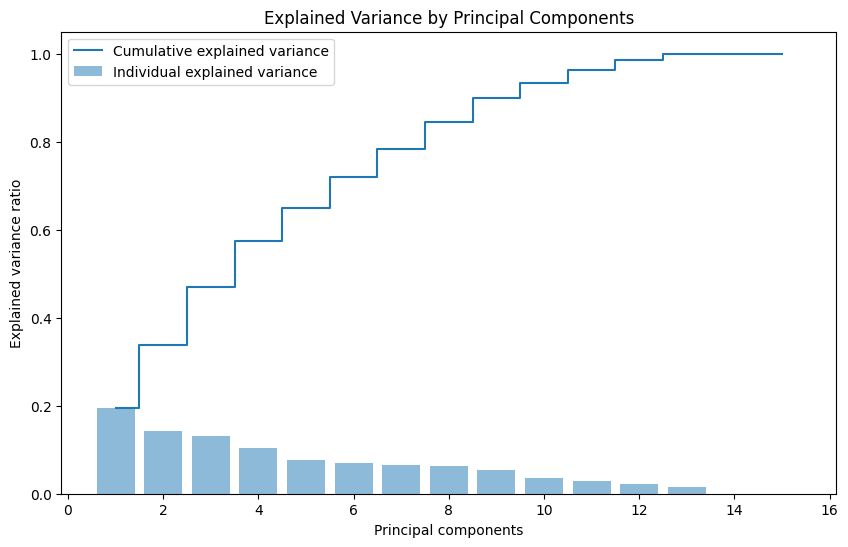

In [9]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

#Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()


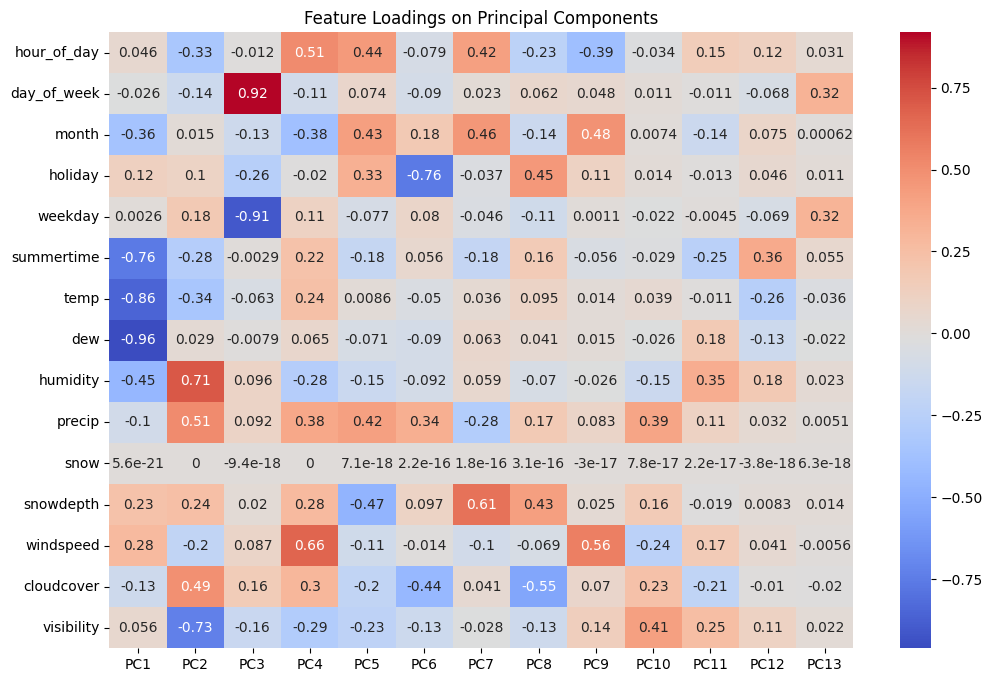

In [19]:
# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(explained_variance))],
                           index=feature_names)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.iloc[:, :13], annot=True, cmap='coolwarm')  # Adjust number of PCs as needed
plt.title('Feature Loadings on Principal Components')
plt.show()



In [ ]:
# Define a threshold for low loading (e.g., absolute loading < 0.1 on top N PCs)
threshold = 0.1
top_n_pcs = 13  # Number of principal components to consider

# Calculate average absolute loading across top_n_pcs
average_loadings = loadings_df.iloc[:, :top_n_pcs].abs().mean(axis=1)

# Identify features below the threshold
bad_features = average_loadings[average_loadings < threshold].index.tolist()

print("Bad Features Identified:")
print(bad_features)


Bad Features Identified:
['snow']
